**Zestaw 5:**

**Zad 1:**

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
    f = 2*x**2+3*x+4              #definicja funkcji f(x)
    df_dx = tape.gradient(f, x)  #gradient 'f' ze względu na zmienną 'x'

df_dx.numpy()

19.0

In [ ]:
x = tf.Variable(4.0)
y = tf.Variable(5.0)

with tf.GradientTape() as tape:
    f = 2 * x**3 + 3 * y**2 + 4           #definicja funkcji f(x,y)
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor(96.0, shape=(), dtype=float32)
tf.Tensor(30.0, shape=(), dtype=float32)


In [ ]:
x = tf.Variable([1.0,3.0])
y = tf.Variable([2.0,1.0])

with tf.GradientTape() as tape:
    f = 2 * x**3 + 3 * y**2 + 4            #definicja funkcji f(x)
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([ 6. 54.], shape=(2,), dtype=float32)
tf.Tensor([12.  6.], shape=(2,), dtype=float32)


In [ ]:
x = tf.random.normal([3, 4, 2])
y = tf.random.normal([3, 4, 2])
z = tf.random.normal([3, 4, 2])

print('=> tensor x: \n', x, '\n\n')
print('=> tensor y: \n', y, '\n\n')
print('=> tensor z: \n', z, '\n\n')

_exp = x**2 + z**2 - 5
_e = tf.math.exp(_exp)
print('=> tensor _e: \n', _e, '\n\n')

with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    tape.watch(z)
    f = x * y * _e                      #definicja funkcji f(x)
    df_dx,df_dy,df_dz = tape.gradient(f,(x,y,z))  #gradient 'f' ze względu na zmienne 'x', 'y', 'z'

print('\n==========================\n\n=> pochodna df_dx:\n\n',df_dx)
print('\n=> pochodna df_dy:\n\n', df_dy)
print('\n=> pochodna df_dz:\n\n', df_dz)

=> tensor x: 
 tf.Tensor(
[[[-0.6241922  -0.88233554]
  [-1.4742103  -1.2047563 ]
  [ 0.12779945  0.02699744]
  [-0.14584678  0.14225496]]

 [[-2.5053823   1.2019627 ]
  [-1.5077909   0.1560512 ]
  [-1.4118606   0.01501423]
  [-0.1923457  -0.25356963]]

 [[-0.5261999   0.7224696 ]
  [-0.32106787 -1.3999425 ]
  [-0.9199234   1.3781135 ]
  [ 0.18952388  0.00510399]]], shape=(3, 4, 2), dtype=float32) 


=> tensor y: 
 tf.Tensor(
[[[-0.25662118  2.6356351 ]
  [-0.74407274 -0.11726227]
  [ 1.3819668   0.4916273 ]
  [ 0.3097506  -0.14380592]]

 [[-0.36382312 -0.7520356 ]
  [-0.37920928 -0.9221801 ]
  [-0.41654682  0.89528686]
  [-0.6385987  -0.56144327]]

 [[ 1.4223757   0.8174126 ]
  [-0.32040754 -0.04707819]
  [-0.7069834  -0.52827346]
  [-1.5281708   0.83598495]]], shape=(3, 4, 2), dtype=float32) 


=> tensor z: 
 tf.Tensor(
[[[-0.16403037 -0.42235583]
  [-0.60583645  0.73491096]
  [-1.7724104   0.6887392 ]
  [-0.23257907  0.12474833]]

 [[-0.9608378  -0.13485068]
  [-0.54345626  0.389532

**Zad 2:**
Otrzymujemy gradient z obiema pochodnymi > 0, więc musimy poruszać się w kierunku przeciwnym do gradientu, zatem od zmiennych x i y odejmujemy ich wartość pomnożoną przez mały współczynnik uczenia, czyli:
new_x = x - 0.001
new_y = y - 0.001

In [ ]:
x = tf.Variable(4.0)
y = tf.Variable(5.0)

wynik1 = 2 * x**3 + 3 * y**2 + 4
print('wynik1 = ', wynik1, '\n\n')

with tf.GradientTape() as tape:
    f = 2 * x**3 + 3 * y**2 + 4           #definicja funkcji f(x,y)
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

wspolczynnik_uczenia = tf.Variable(0.0001)

new_x = x - wspolczynnik_uczenia * df_dx
new_y = y - wspolczynnik_uczenia * df_dy

wynik2 = 2 * new_x**3 + 3 * new_y**2 + 4
print('\n\nwynik2 = ', wynik2, '\n\n')

wynik1 =  tf.Tensor(207.0, shape=(), dtype=float32) 


tf.Tensor(96.0, shape=(), dtype=float32)
tf.Tensor(30.0, shape=(), dtype=float32)


wynik2 =  tf.Tensor(197.10611, shape=(), dtype=float32) 




**Zad 3:**

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = -0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

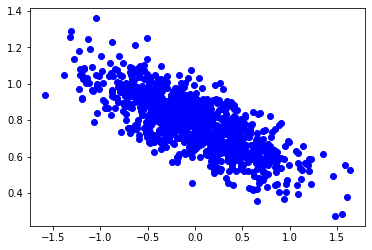

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

Definicja błędu:

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [ ]:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [ ]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
Loss = []
epochs = 200

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(0.9*dloss_da)
  b.assign_sub(0.9*dloss_db)

In [ ]:
np.max(Loss),np.min(Loss)

(0.29348502, 0.010497986)

In [ ]:
print(a.numpy())
print(b.numpy())

-0.22580066
0.7814632


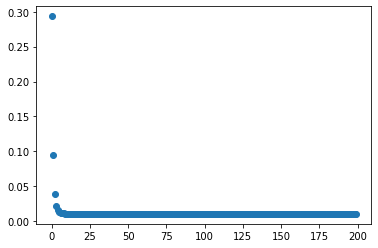

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

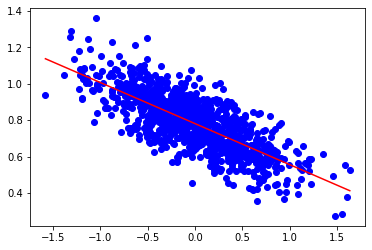

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()